# 🚢 Internship Task 1 & Task 2: Titanic Dataset Analysis

## 🎯 Overall Objective

To learn and apply data preprocessing and exploratory data analysis techniques using the Titanic dataset.  
We aim to clean the data for machine learning readiness (Task 1) and then extract valuable insights through statistics and visualization (Task 2).

---

## 🧰 Tools & Libraries Used

- **Python**
- **Pandas** – data manipulation
- **NumPy** – numerical operations
- **Matplotlib / Seaborn** – static data visualization
- **Plotly** – interactive plots
- **Scikit-learn** – feature scaling
- **Statsmodels** – mosaic and advanced EDA plots

---

## 📥 Dataset Overview

- **Dataset**: Titanic-Dataset.csv  
- **Shape**: 891 rows × 12 columns  
- **Source**: Loaded locally using `pd.read_csv()`  
- **Target Variable**: `Survived` (0 = No, 1 = Yes)

---

## 📌 Task 1 – Data Cleaning & Preprocessing

### 🧾 Column Interpretation

| Column       | Description |
|--------------|-------------|
| PassengerId  | Unique passenger ID |
| Survived     | Survival status (0 = No, 1 = Yes) |
| Pclass       | Ticket class (1 = Upper, 2 = Middle, 3 = Lower) |
| Name         | Passenger name |
| Sex          | Gender |
| Age          | Age in years |
| SibSp        | Siblings/spouses aboard |
| Parch        | Parents/children aboard |
| Ticket       | Ticket number |
| Fare         | Ticket fare |
| Cabin        | Cabin number (often missing) |
| Embarked     | Port of embarkation (C, Q, S) |

---

### 🔍 Step 1: Data Overview

- Used `.info()`, `.describe()`, `.isnull().sum()`
- Detected missing values in `Age`, `Embarked`, `Cabin`
- Identified categorical vs numerical columns

---

### 🧼 Step 2: Preprocessing

#### a) Dropped Irrelevant Columns:
- `PassengerId`, `Name`, `Ticket`

#### b) Null Value Handling:
- `Age` → Filled with **mean**
- `Embarked` → Filled with **mode**
- `Cabin` → Dropped (77% null values)

#### c) Outlier Treatment:
- Visualized `Age` and `Fare` with **boxplots**
- Replaced outliers using the **IQR method**

#### d) Categorical Encoding:
- One-hot encoded `Sex` and `Embarked`
- Converted booleans to integers

#### e) Feature Scaling:
- Standardized `Fare` using `StandardScaler`

---

### ✅ Final Dataset is:
- Cleaned and transformed
- All features are numeric
- No missing values
- Scaled/encoded appropriately

---

## 📈 Task 2 – EDA & Visualization

### 🔎 Step 1: Univariate Analysis

- **Categorical**: Countplots, Pie charts, Donut charts
- **Numerical**: Histograms, KDE plots, Boxplots, Violin, Strip, ECDF

---

### 🔁 Step 2: Bivariate Analysis

- **Categorical vs Categorical**:  
  - Cross-tabulations, Mosaic plots, Cluster maps

- **Categorical vs Numerical**:  
  - Boxplots, Swarm plots, Violin plots, Barplots

- **Numerical vs Numerical**:  
  - Scatter plots, Hexbin plots, Joint plots, Reg plots

- **Correlation Matrix**:  
  - Full + Masked heatmaps  
  - Target-wise correlation summary

---

### 🔺 Step 3: Multivariate Analysis

- **3D Scatter Plots** (Age vs Fare vs Parch)
- **Pairplots with hue** = `Survived`, `Pclass`, or `Sex`
- **Pivot Tables** for aggregated summaries
- Group-wise trend visualizations

---

## 📊 Summary Insights

- 💡 Women had a much higher survival rate than men
- 💡 First-class passengers survived more than third-class
- 💡 Higher fare and lower Pclass often meant higher survival
- 💡 Strong correlation between `Parch` and `SibSp` (family)
- 💡 Fare distribution is right-skewed and had extreme outliers

---

## 📚 Conceptual Q&A (EDA)

**Q1. What is the purpose of EDA?**  
To understand data using stats and visuals before modeling.

**Q2. How do boxplots help?**  
They show spread, median, and outliers in numeric data.

**Q3. What is correlation?**  
It shows how strongly variables move together.

**Q4. How to detect skewness?**  
Use histograms, boxplots, or `.skew()` function.

**Q5. What is multicollinearity?**  
Highly correlated features which distort model accuracy.

**Q6. Tools used in EDA?**  
Pandas, Seaborn, Matplotlib, Plotly, Statsmodels.

**Q7. When did EDA help you find an issue?**  
Revealed 77% missing in `Cabin`, outliers in `Fare`.

**Q8. Role of visualization in ML?**  
It uncovers patterns, supports decisions, and improves communication.

---

## 🧠 Conclusion

These tasks built the foundation for applying machine learning models by:
- Cleaning and transforming raw data (Task 1)
- Extracting deep visual and statistical insights (Task 2)

📌 The cleaned dataset is now **ready for modeling and prediction tasks**.



## Import the required library


In [1]:
# import numerical python for performing operations on different data structure.
import numpy as np 

# import pandas for converting different file format into pandas dataframe.
import pandas as pd

# import seaborn and matplotlib for creating interactive visualization.
import seaborn as sns
import matplotlib.pyplot as plt


## Load the data

In [2]:
# Load the data from local
df_Titanic_Dataset = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# Check the first five observation from data
df_Titanic_Dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# Check the last 5 observation 
df_Titanic_Dataset.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## Data Overview

In [5]:
# checks the columns we have into the data
df_Titanic_Dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 📘 Interpretation of Titanic Dataset Variables

- **PassengerId**  
  A unique identifier assigned to each passenger in the dataset.

- **Survived**  
  Survival status of the passenger  
  `0 = Did not survive`, `1 = Survived`

- **Pclass**  
  Passenger class indicating socio-economic status  
  `1 = Upper`, `2 = Middle`, `3 = Lower`

- **Name**  
  Full name of the passenger, often includes title (e.g., Mr., Mrs., Miss).

- **Sex**  
  Gender of the passenger (`Male` or `Female`).

- **Age**  
  Age of the passenger in years. Children may have fractional values (e.g., `0.5 = 6 months old`).

- **SibSp** *(Siblings/Spouses Aboard)*  
  Number of siblings or spouses the passenger had aboard the Titanic.

- **Parch** *(Parents/Children Aboard)*  
  Number of parents or children the passenger had aboard the Titanic.

- **Ticket**  
  Ticket number used for traveling; may indicate group or family bookings.

- **Fare**  
  The amount of money paid for the ticket (in British Pounds).

- **Cabin**  
  Cabin number/letter the passenger stayed in. Often missing in the dataset.

- **Embarked**  
  Port where the passenger boarded the Titanic  
  `C = Cherbourg`, `Q = Queenstown`, `S = Southampton`


In [6]:
# Check the shape of data
df_Titanic_Dataset.shape

(891, 12)

**Interpretation**
 - we have 891 observation and 12 attributes

In [7]:
# Check the basic info 
df_Titanic_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Interpretation**
 - We have 7 numerical columns and 5 categorical columns
 - This data acquires 83.7+ kb space. 

In [8]:
# Check for basics statistics 
df_Titanic_Dataset.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

## Data Preprocessing

### Data Cleaning

In [9]:
# Check the name of the columns 
df_Titanic_Dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Interpretation**
 - After looking at the columns i conclude that there is no need to rename the columns.

In [10]:
# Drop irrelevant columns (PassengerId, Name, Ticket, etc.)
df_Titanic_Dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [11]:
# Check the format of columns 
df_Titanic_Dataset.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

### Null Value Handling

### 🧹 Null Value Handling Strategy

In our dataset, we may encounter two types of null values:

- **Valid Null Values**: Represented as `NaN`, empty strings, etc.
- **Invalid Null Values**: Represented by placeholders like `@`, `#`, `na`, `-`, `...` — these should be converted to `NaN` first.

We follow certain industry-inspired rules (Manufacturing Laws) to handle missing data:

---

#### 📏 **Manufacturing Laws for Handling Nulls**

- **Law No. 1**:  
  If **null percentage < 15%**, **remove the rows** (observations).

- **Law No. 2**:  
  If **null percentage is between 20% and 70%**, **impute** the missing values.

- **Law No. 3**:  
  If **null percentage > 75%**, **drop the columns** (attributes).

---

#### 🧠 **Imputation Techniques**

- For **numerical columns**:  
  Replace missing values with the **mean** of the column.

- For **categorical columns**:  
  Replace missing values with the **mode** (most frequent category) of the column.


In [12]:
# Check the count null record
df_Titanic_Dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Interpretation**
 - After observation we conclude that there is some null record are present so we treat it.

In [13]:
# Fill missing Age with median
df_Titanic_Dataset['Age'] = df_Titanic_Dataset['Age'].fillna(df_Titanic_Dataset['Age'].median())
# Fill missing Embarked with mode
df_Titanic_Dataset['Embarked'] = df_Titanic_Dataset['Embarked'].fillna(df_Titanic_Dataset['Embarked'].mode()[0])

In [14]:
df_Titanic_Dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

**Interpretation**
 - After observation we conclude that there we treated Age and Embarked now we remove cabin column for treating null handling because it contain more than 70%.

In [15]:
# Find the %ge for null records
# Notes we have to find %ge of null records because the laws we have handlin the null values depends on %ge.
df_Titanic_Dataset.isnull().sum()/len(df_Titanic_Dataset)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.000000
dtype: float64

In [16]:
# Drop Cabin column
df_Titanic_Dataset.drop(columns=['Cabin'], inplace=True)

In [17]:
#### now check that cabin column is remove or not.
df_Titanic_Dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Outlier Treatment 

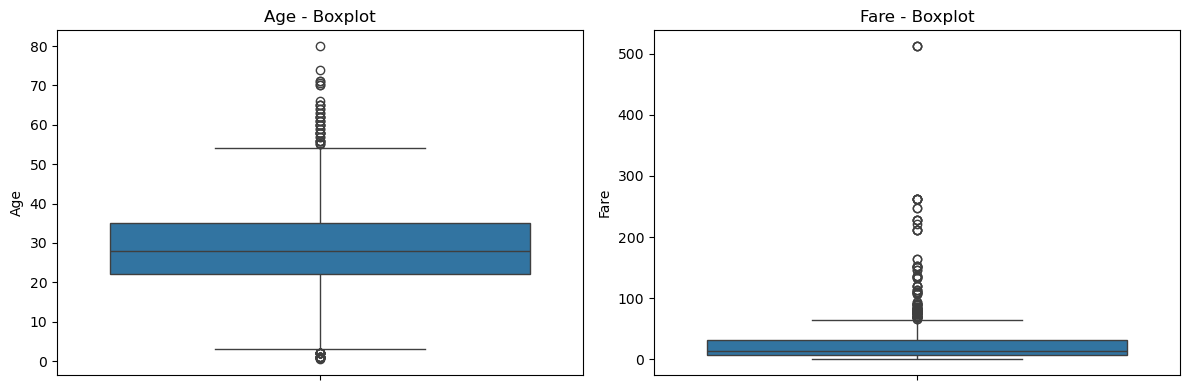

Survived  Pclass     Sex   Age  SibSp  Parch       Fare Embarked
0         0       3    male  22.0      1      0   7.250000        S
1         1       1  female  38.0      1      0  32.204208        C
2         1       3  female  26.0      0      0   7.925000        S
3         1       1  female  35.0      1      0  53.100000        S
4         0       3    male  35.0      0      0   8.050000        S

In [18]:
# Visualize with boxplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(y=df_Titanic_Dataset['Age'], ax=axs[0])
axs[0].set_title('Age - Boxplot')
sns.boxplot(y=df_Titanic_Dataset['Fare'], ax=axs[1])
axs[1].set_title('Fare - Boxplot')
plt.tight_layout()
plt.show()

# Treat outliers using IQR
def treat_outliers(col):
    Q1 = df_Titanic_Dataset[col].quantile(0.25)
    Q3 = df_Titanic_Dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mean_val = df_Titanic_Dataset[col].mean()
    df_Titanic_Dataset.loc[(df_Titanic_Dataset[col] < lower) | (df_Titanic_Dataset[col] > upper), col] = mean_val

treat_outliers('Age')
treat_outliers('Fare')

df_Titanic_Dataset.head()


✅ Outliers in Age and Fare have been treated using the IQR method — values beyond 1.5×IQR were replaced with the column mean. The boxplots confirmed the presence of outliers, and now df_Titanic_Dataset is updated with cleaned values.

#### Encode Categorical Variables

In [19]:
# One-hot encode 'Sex' and 'Embarked'
df_Titanic_Dataset = pd.get_dummies(df_Titanic_Dataset, columns=['Sex', 'Embarked'], drop_first=True)


In [20]:
df_Titanic_Dataset.head()


Survived  Pclass   Age  SibSp  Parch       Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.250000      True       False   
1         1       1  38.0      1      0  32.204208     False       False   
2         1       3  26.0      0      0   7.925000     False       False   
3         1       1  35.0      1      0  53.100000     False       False   
4         0       3  35.0      0      0   8.050000      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True

#### Normalize/Standardize Numerical Features

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_Titanic_Dataset[[ 'Fare']] = scaler.fit_transform(df_Titanic_Dataset[['Fare']])


### ✅ Final Cleaned Dataset

In [22]:
df_Titanic_Dataset.head()


Survived  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0 -0.918474      True       False   
1         1       1  38.0      1      0  0.923286     False       False   
2         1       3  26.0      0      0 -0.868656     False       False   
3         1       1  35.0      1      0  2.465512     False       False   
4         0       3  35.0      0      0 -0.859430      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True

### Convert True/False to 0/1 

In [23]:
df_Titanic_Dataset['Sex_male'] = df_Titanic_Dataset['Sex_male'].astype(int)
df_Titanic_Dataset['Embarked_Q'] = df_Titanic_Dataset['Embarked_Q'].astype(int)
df_Titanic_Dataset['Embarked_S'] = df_Titanic_Dataset['Embarked_S'].astype(int)

#### Class balance check (for Survived)

In [24]:
df_Titanic_Dataset['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

**Interpretation**
 - Ensure that the target variable is not heavily imbalanced

*Feature correlation check (EDA)*
 - We use df.corr() or heatmap to find if some features are irrelevant or strongly correlated.

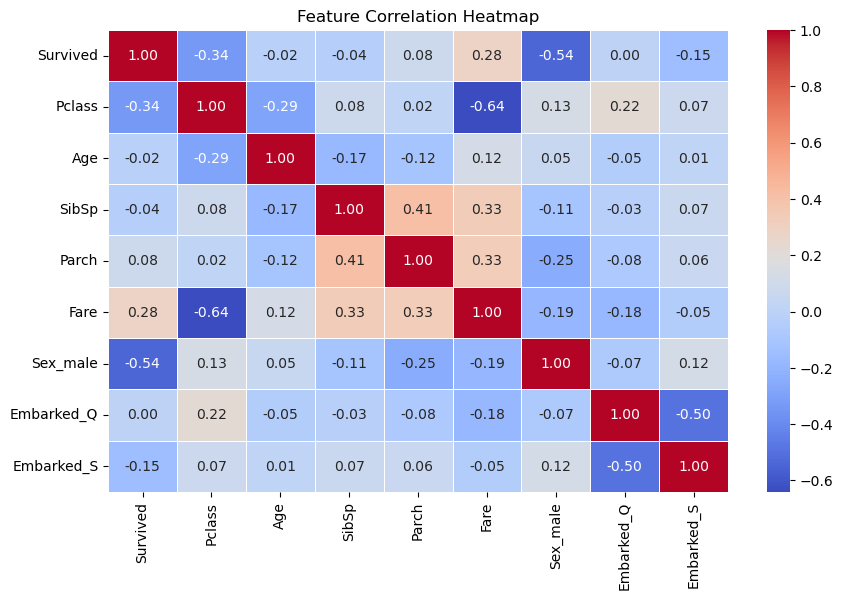

In [25]:
# Compute correlation matrix
corr_matrix = df_Titanic_Dataset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### feature correlation heatmap
 - 'Pclass' and 'Fare' are moderately negatively correlated (-0.64), suggesting lower class passengers paid less fare.
 - 'Parch' and 'SibSp' are positively correlated (0.41), as they both represent family relationships.
 - 'Fare' has some correlation (0.28) with 'Survived', implying higher fare passengers were more likely to survive.
 - 'Age', 'SibSp', and 'Parch' have weak correlation with 'Survived', so they might still provide useful predictive signals.
 - 'PassengerId' has no meaningful correlation and can be dropped from the model.

In [29]:
df_Titanic_Dataset.head(10)

Survived  Pclass        Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3  22.000000      1      0 -0.918474         1           0   
1         1       1  38.000000      1      0  0.923286         0           0   
2         1       3  26.000000      0      0 -0.868656         0           0   
3         1       1  35.000000      1      0  2.465512         0           0   
4         0       3  35.000000      0      0 -0.859430         1           0   
5         0       3  28.000000      0      0 -0.829295         1           1   
6         0       1  54.000000      0      0  2.374178         1           0   
7         0       3  29.361582      3      1  0.101888         1           0   
8         1       3  27.000000      0      2 -0.631865         0           0   
9         1       2  14.000000      1      0  0.765828         0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  
5           0  
6           1  
7           1  
8           1  
9           0

In [31]:
# As seeing in head some of age is showing float number so we round off and ake itno integer form.
df_Titanic_Dataset['Age'] = df_Titanic_Dataset['Age'].round().astype(int)


## Final Cleaned Dataset

In [33]:
# Now this is cleaned dataset
df_Titanic_Dataset.head(10)

Survived  Pclass  Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3   22      1      0 -0.918474         1           0   
1         1       1   38      1      0  0.923286         0           0   
2         1       3   26      0      0 -0.868656         0           0   
3         1       1   35      1      0  2.465512         0           0   
4         0       3   35      0      0 -0.859430         1           0   
5         0       3   28      0      0 -0.829295         1           1   
6         0       1   54      0      0  2.374178         1           0   
7         0       3   29      3      1  0.101888         1           0   
8         1       3   27      0      2 -0.631865         0           0   
9         1       2   14      1      0  0.765828         0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  
5           0  
6           1  
7           1  
8           1  
9           0

In [34]:
# Save to local project directory (visible in Jupyter file browser)
df_Titanic_Dataset.to_csv('Titanic_Cleaned.csv', index=False)

# Continue with Task_2

### Let's dive into EDA 
    EDA(Exploratory Data Analysis) --->It is a method utilised to convert data into information.
	a) univariant analysis:- When we took single column at a time for analysis is called univariant analysis. Here, if the column is numerical in nature  then we have to find minimum, maximum , avg these parameters with that we have to create a graph (Histogram, KDE(kernel density plot)), if the column is categorical in nature then, check the count of each category present in that column and visualise it.
	b) bivariant analysis:-  When we took 2 column at a time for analysis is called bivariant analysis.
		Categorical - Categorical--> Cross-tab
		Categorical-numerical --> Bar graph
		Numerical- Numerical --> Scatter plot
		For finding the accurate pairs we have to follow following procedures:- Find the correlation matrix of numerical data 							
	c) multivariant analysis:-  When we took more than 2 column at a time for analysis is called multivariant analysis.
		Numerical - Numerical - Numerical:- 
		Numerical - Numerical - Categorical:- Pairwise, pair plot with hue parameter
		Categorical- Categorical - Numerical:- Pivot tables.

In [34]:
# import necessary liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ensure correct data types
df_Titanic_Dataset['Survived'] = df_Titanic_Dataset['Survived'].astype('category')
df_Titanic_Dataset['Sex_male'] = df_Titanic_Dataset['Sex_male'].astype('category')
df_Titanic_Dataset['Embarked_Q'] = df_Titanic_Dataset['Embarked_Q'].astype('category')
df_Titanic_Dataset['Embarked_S'] = df_Titanic_Dataset['Embarked_S'].astype('category')

### (a) Univariate Analysis
1. 📊 Summary Statistics

In [35]:
# Descriptive stats for numerical columns
display(df_Titanic_Dataset.describe().T)

# Median
print("Median values:")
print(df_Titanic_Dataset.median(numeric_only=True))


count          mean       std       min        25%        50%  \
Pclass  891.0  2.308642e+00  0.836071  1.000000   2.000000   3.000000   
Age     891.0  2.854545e+01  9.793997  3.000000  24.000000  28.000000   
SibSp   891.0  5.230079e-01  1.102743  0.000000   0.000000   0.000000   
Parch   891.0  3.815937e-01  0.806057  0.000000   0.000000   0.000000   
Fare    891.0  5.183533e-17  1.000562 -1.453565  -0.869733  -0.386764   

              75%        max  
Pclass   3.000000   3.000000  
Age     33.000000  54.000000  
SibSp    1.000000   8.000000  
Parch    0.000000   6.000000  
Fare     0.834408   3.343799

Median values:
Pclass     3.000000
Age       28.000000
SibSp      0.000000
Parch      0.000000
Fare      -0.386764
dtype: float64


Key Insights
🎫 Passenger Class (Pclass)

Most passengers traveled in 3rd class (median = 3)
Range from 1st to 3rd class
Mean of ~2.31 indicates more lower-class passengers

👥 Age Distribution

Average age: ~28.5 years
Age range: 3 to 54 years (in this sample)
Standard deviation: ~9.8 years showing moderate spread

👨‍👩‍👧‍👦 Family Relationships

SibSp (Siblings/Spouses): Most passengers (median = 0) traveled without siblings or spouses
Parch (Parents/Children): Most passengers (median = 0) traveled without parents or children
Maximum family sizes: 8 siblings/spouses, 6 parents/children

💰 Fare Analysis

The Fare column appears to be standardized/normalized (mean ≈ 0, std ≈ 1)
Negative median suggests lower fares were more common
Wide range indicating significant fare variation

📊 Dataset Characteristics

Total observations: 891 passengers
All numerical columns have complete data (no missing values shown)
Data types: float64 for all variables

## 2. 📈 Numerical Features – Histogram + KDE

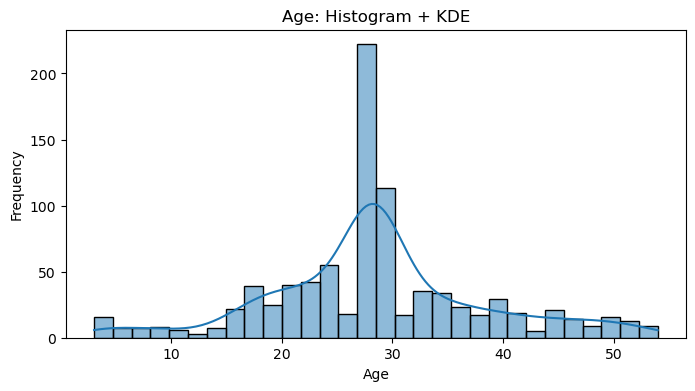

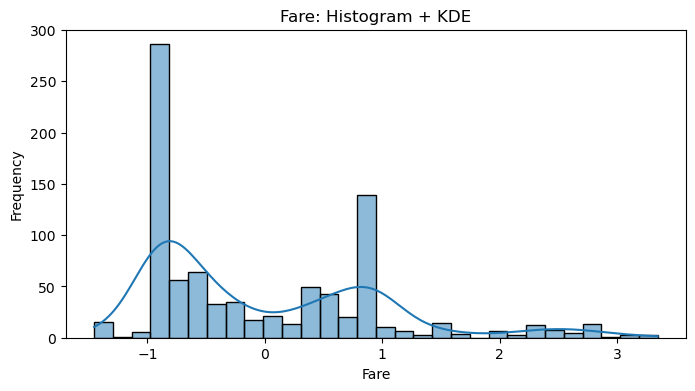

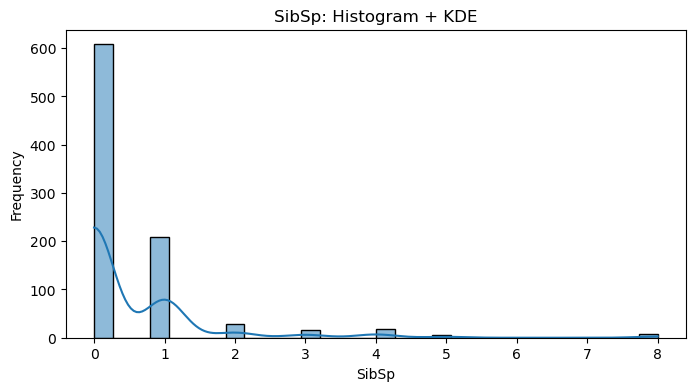

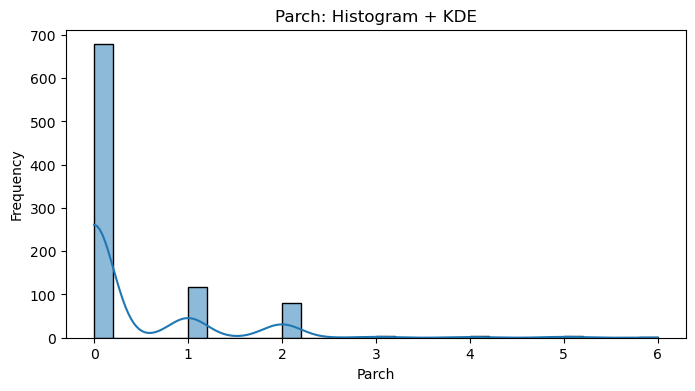

In [37]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_Titanic_Dataset[col], kde=True, bins=30)
    plt.title(f'{col}: Histogram + KDE')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

🔹 Boxplots (Numerical)

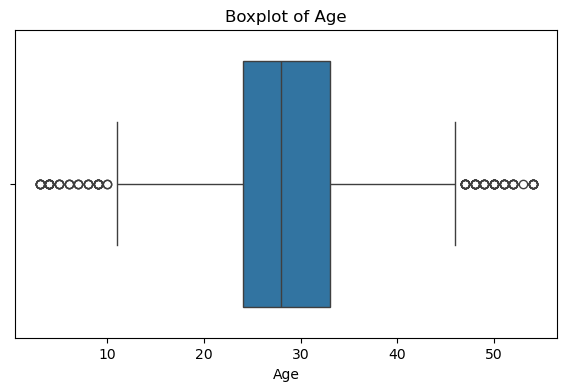

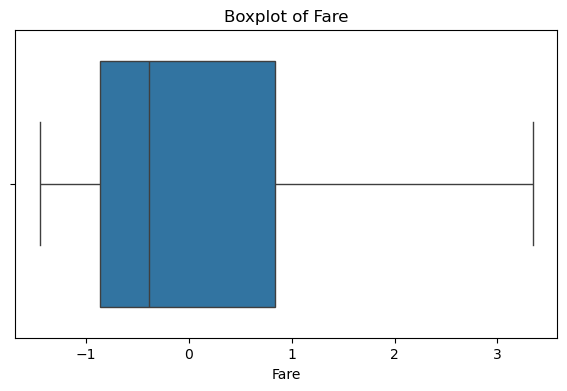

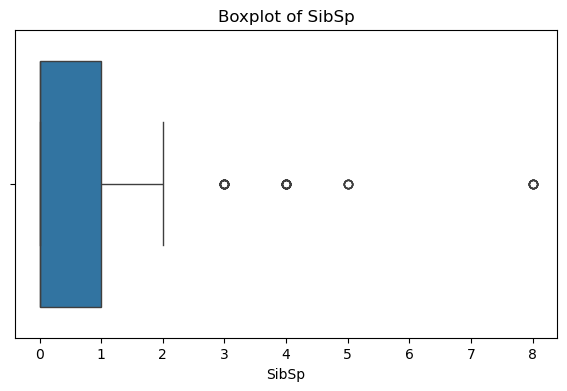

In [69]:
for col in ['Age', 'Fare', 'SibSp']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df_Titanic_Dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


🔹 Violin Plots (shows distribution & density)

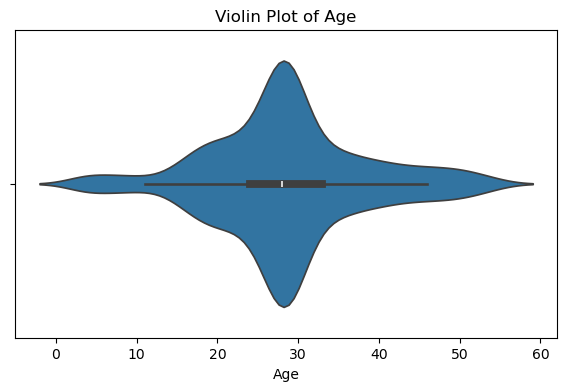

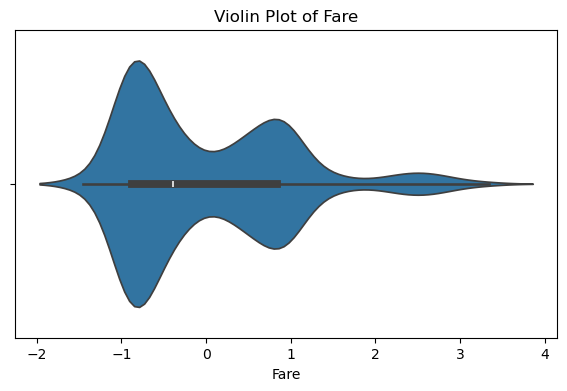

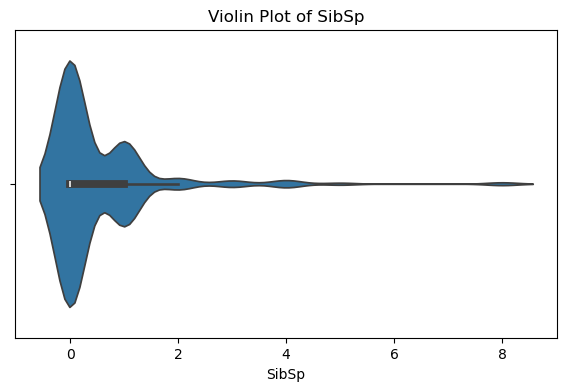

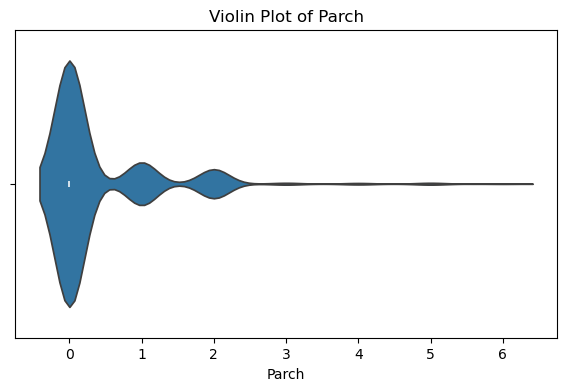

In [70]:
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    plt.figure(figsize=(7, 4))
    sns.violinplot(x=df_Titanic_Dataset[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()


🔹 Strip Plots (scatter-style spread)

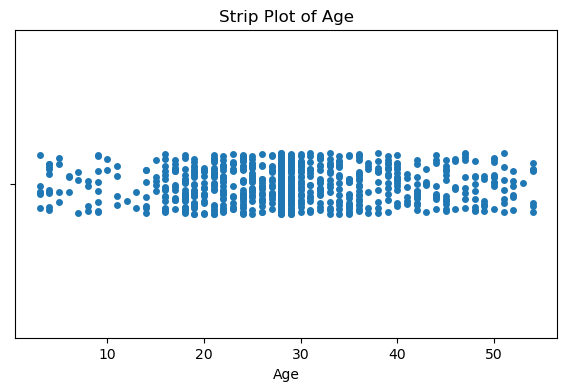

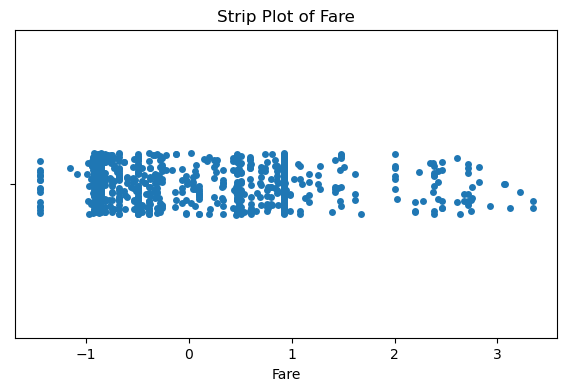

In [71]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(7, 4))
    sns.stripplot(x=df_Titanic_Dataset[col], jitter=True)
    plt.title(f'Strip Plot of {col}')
    plt.show()


🔹 ECDF Plot (Plotly)


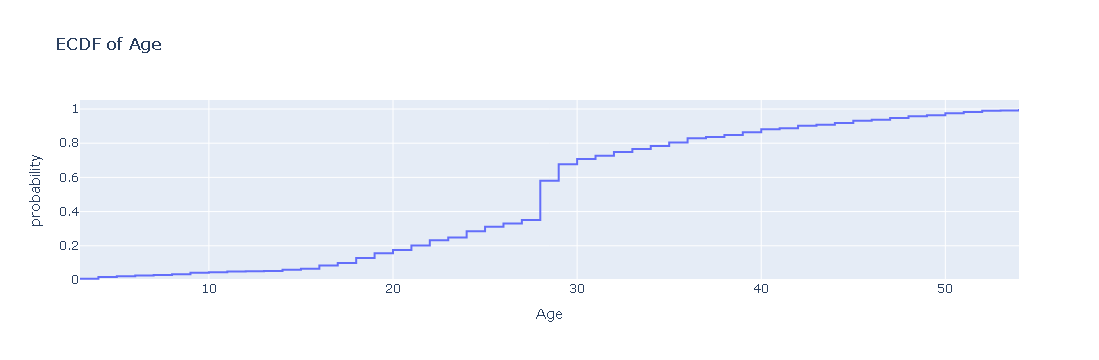

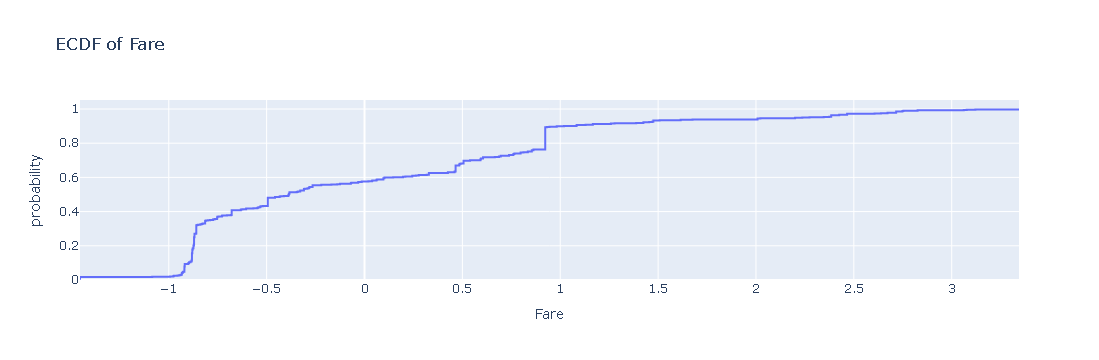

In [72]:
for col in ['Age', 'Fare']:
    fig = px.ecdf(df_Titanic_Dataset, x=col, title=f"ECDF of {col}")
    fig.show()


## 3. 🟦 Categorical Features – Countplots

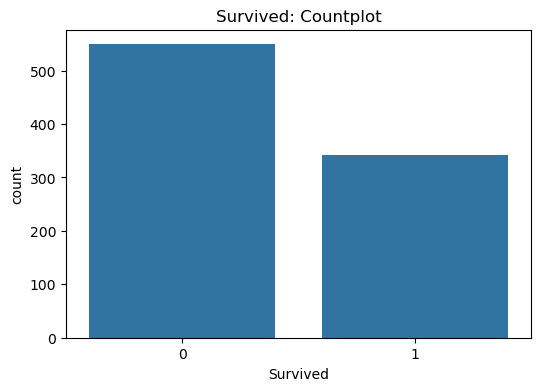

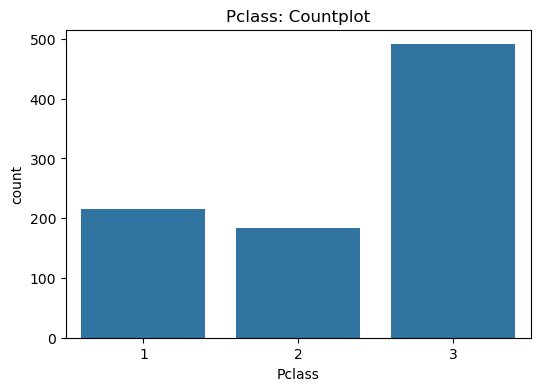

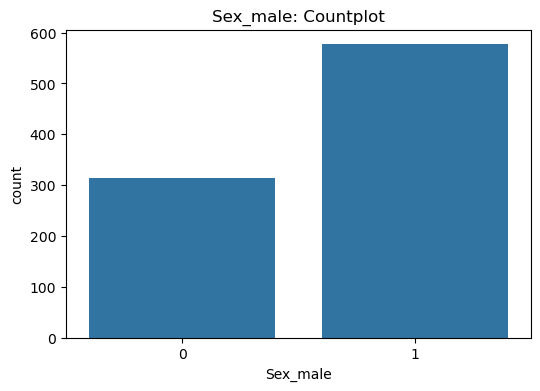

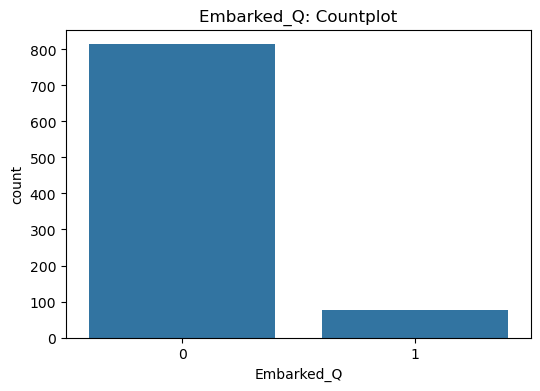

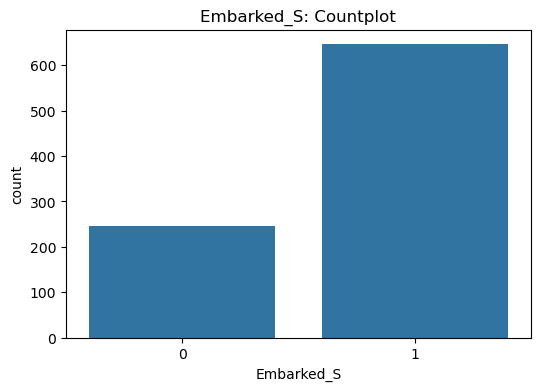

In [38]:
cat_cols = ['Survived', 'Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_Titanic_Dataset, x=col)
    plt.title(f'{col}: Countplot')
    plt.show()


🔹 Countplot with Hue 

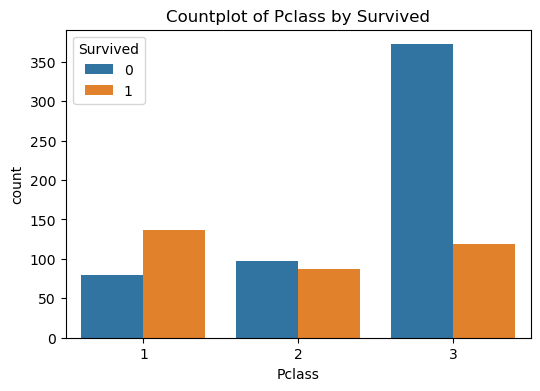

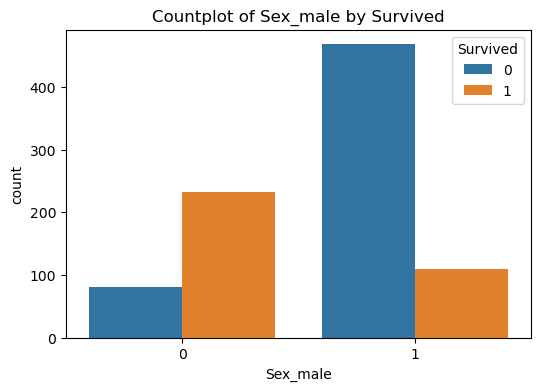

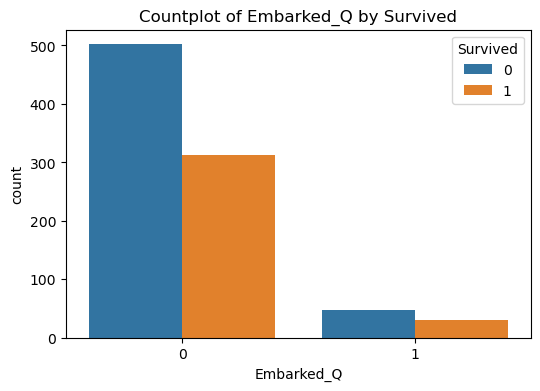

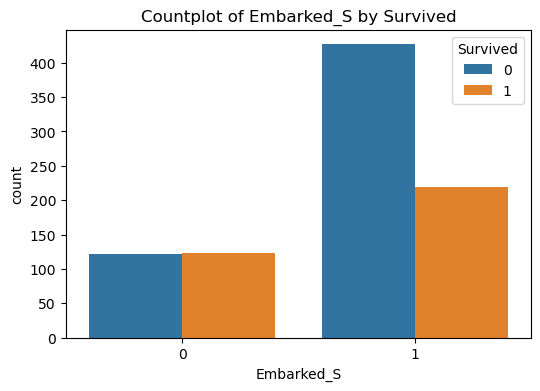

In [73]:
cat_cols = ['Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_Titanic_Dataset, x=col, hue='Survived')
    plt.title(f'Countplot of {col} by Survived')
    plt.show()


🔹 Pie Charts (Matplotlib)

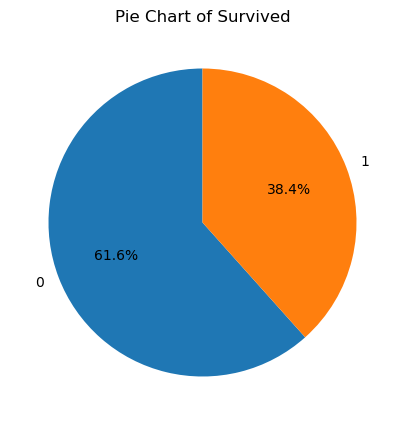

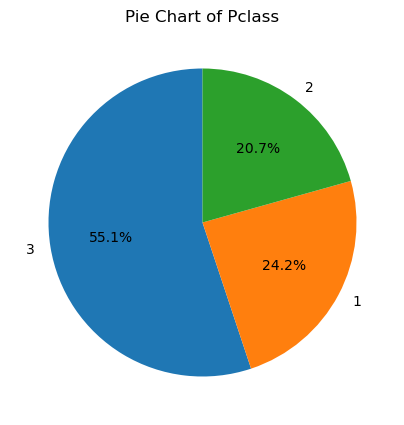

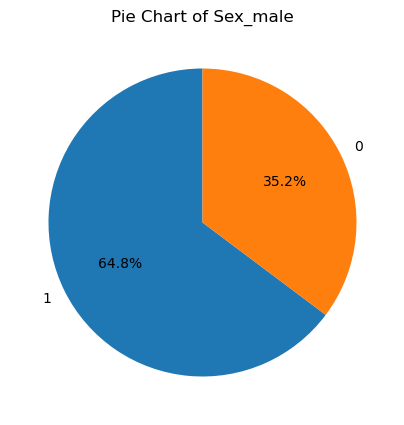

In [74]:
for col in ['Survived', 'Pclass', 'Sex_male']:
    counts = df_Titanic_Dataset[col].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.show()


🔹 Donut Chart (Plotly)

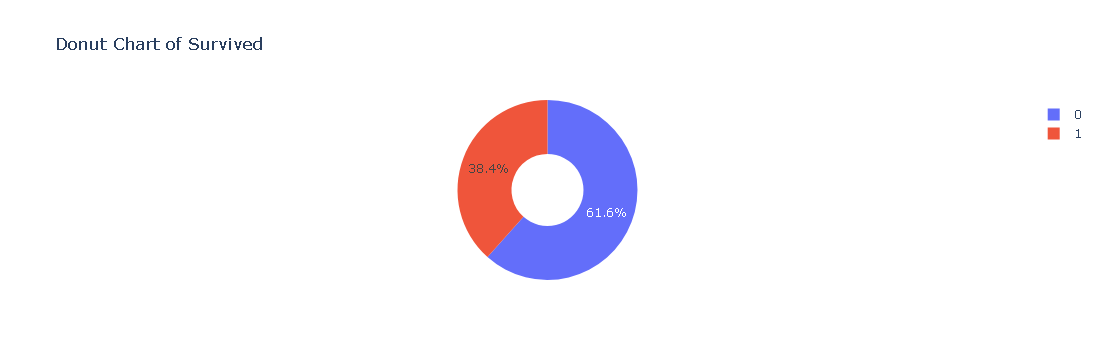

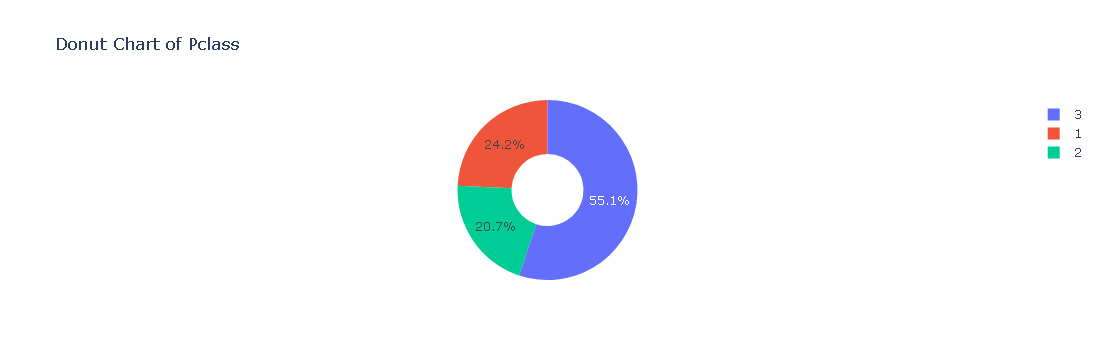

In [75]:
for col in ['Survived', 'Pclass']:
    fig = px.pie(df_Titanic_Dataset, names=col, hole=0.4, title=f"Donut Chart of {col}")
    fig.show()


🔹 Horizontal Barplot from Value Counts

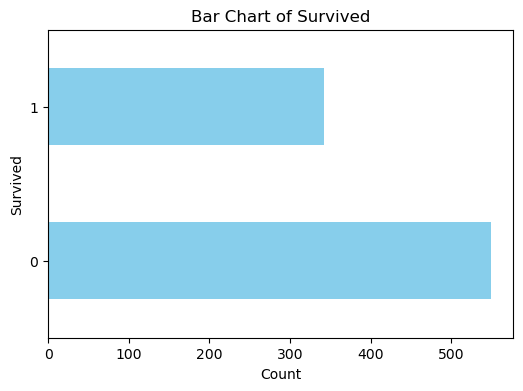

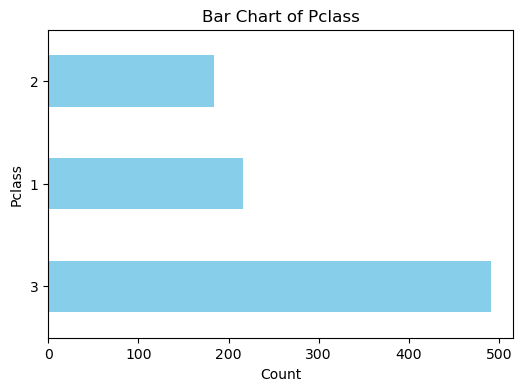

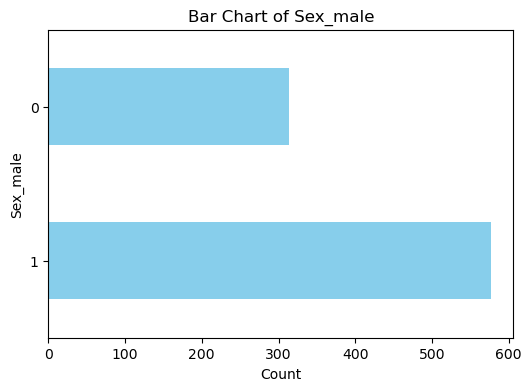

In [76]:
for col in ['Survived', 'Pclass', 'Sex_male']:
    plt.figure(figsize=(6, 4))
    df_Titanic_Dataset[col].value_counts().plot(kind='barh', color='skyblue')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel('Count')
    plt.show()


### 🔹 (b) Bivariate Analysis
1. 📊 Categorical vs Categorical → Cross-tabulation

In [40]:
# Survived vs Pclass
print(pd.crosstab(df_Titanic_Dataset['Survived'], df_Titanic_Dataset['Pclass'], margins=True))

# Survived vs Sex
print(pd.crosstab(df_Titanic_Dataset['Survived'], df_Titanic_Dataset['Sex_male'], margins=True))


Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891
Sex_male    0    1  All
Survived               
0          81  468  549
1         233  109  342
All       314  577  891


✅ Basic Cross-tab with Percentage

In [79]:
# Survived vs Pclass with %
crosstab = pd.crosstab(df_Titanic_Dataset['Survived'], df_Titanic_Dataset['Pclass'], normalize='columns') * 100
print(crosstab.round(2))


Pclass        1      2      3
Survived                     
0         37.04  52.72  75.76
1         62.96  47.28  24.24


✅ Mosaic Plot

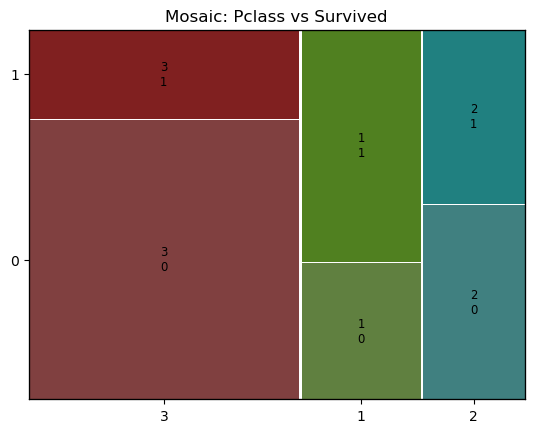

In [77]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df_Titanic_Dataset, ['Pclass', 'Survived'])
plt.title('Mosaic: Pclass vs Survived')
plt.show()


✅ Cluster Map of Multiple Categorical Features

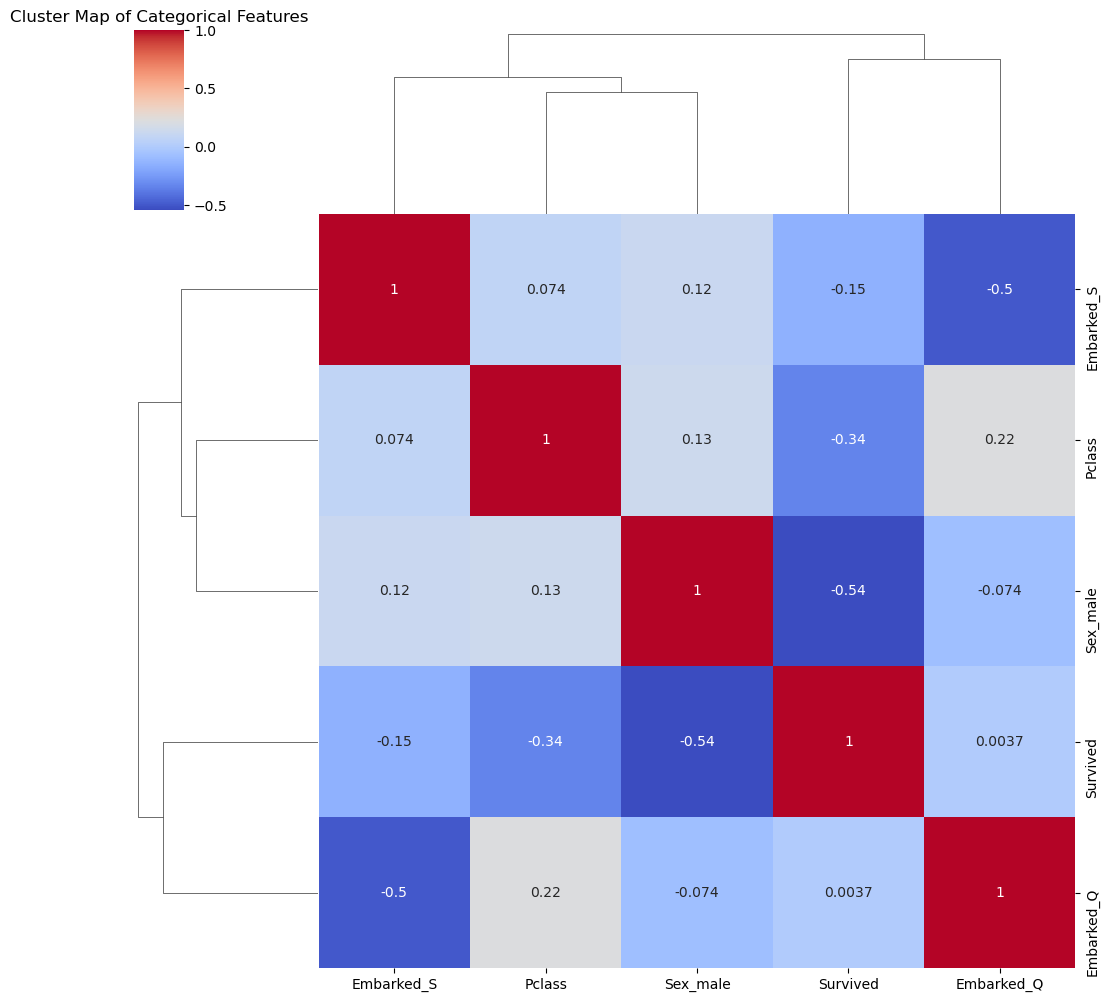

In [80]:
cat_df = df_Titanic_Dataset[['Survived', 'Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']].astype(int)
sns.clustermap(cat_df.corr(), annot=True, cmap='coolwarm')
plt.title("Cluster Map of Categorical Features")
plt.show()


### 2. 📉 Categorical vs Numerical → Barplots

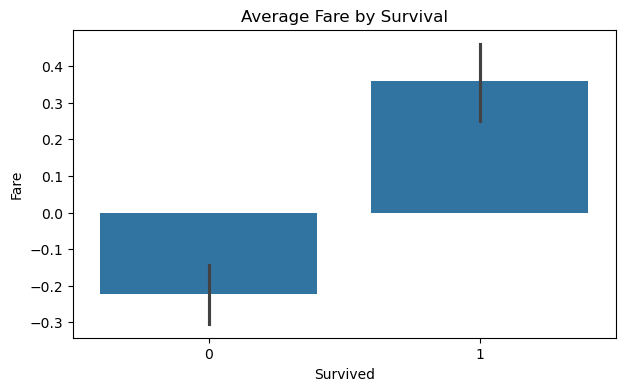

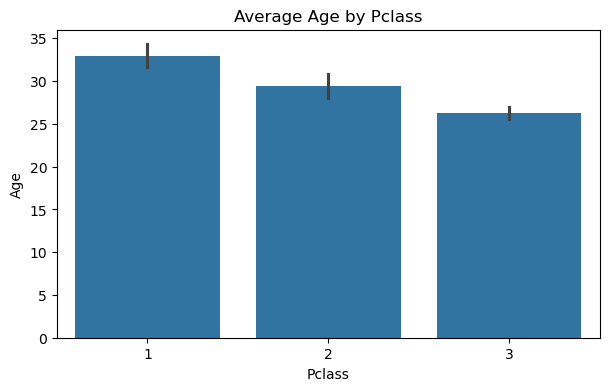

In [41]:
# Average Fare by Survival
plt.figure(figsize=(7, 4))
sns.barplot(x='Survived', y='Fare', data=df_Titanic_Dataset)
plt.title("Average Fare by Survival")
plt.show()

# Average Age by Pclass
plt.figure(figsize=(7, 4))
sns.barplot(x='Pclass', y='Age', data=df_Titanic_Dataset)
plt.title("Average Age by Pclass")
plt.show()


✅ Boxplots by Category

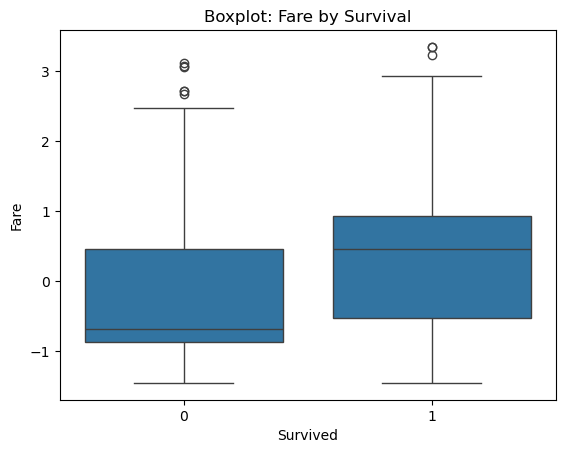

In [81]:
sns.boxplot(data=df_Titanic_Dataset, x='Survived', y='Fare')
plt.title("Boxplot: Fare by Survival")
plt.show()


✅ Violin Plot

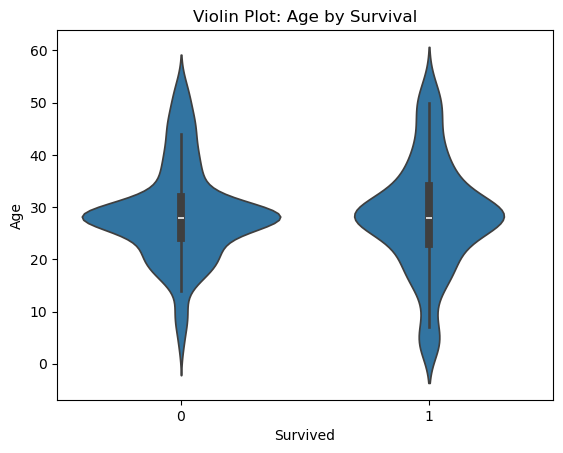

In [82]:
sns.violinplot(data=df_Titanic_Dataset, x='Survived', y='Age')
plt.title("Violin Plot: Age by Survival")
plt.show()


✅ Swarm Plot

C:\Users\satya\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\satya\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\satya\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\satya\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\satya\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\satya\anaconda3\Lib\site-packag

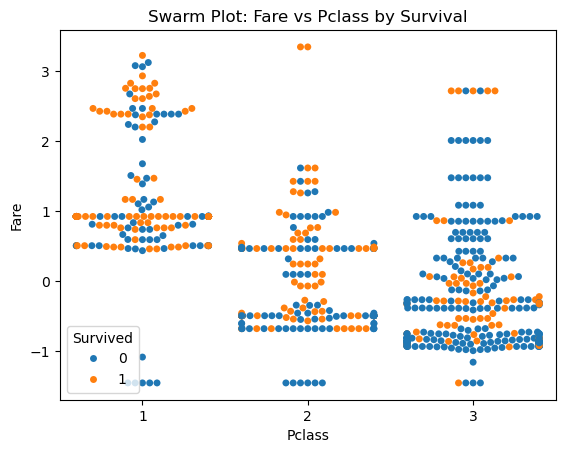

In [83]:
sns.swarmplot(data=df_Titanic_Dataset, x='Pclass', y='Fare', hue='Survived')
plt.title("Swarm Plot: Fare vs Pclass by Survival")
plt.show()


### 3. 🔘 Numerical vs Numerical → Scatter Plots

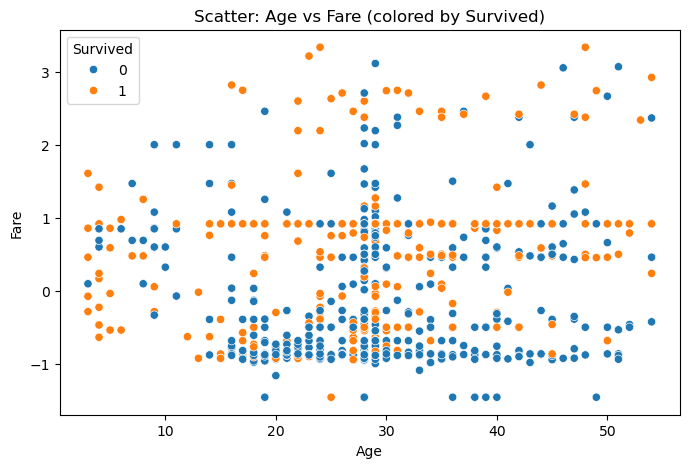

In [43]:
# Age vs Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_Titanic_Dataset, x='Age', y='Fare', hue='Survived')
plt.title('Scatter: Age vs Fare (colored by Survived)')
plt.show()


✅ Hexbin Plot

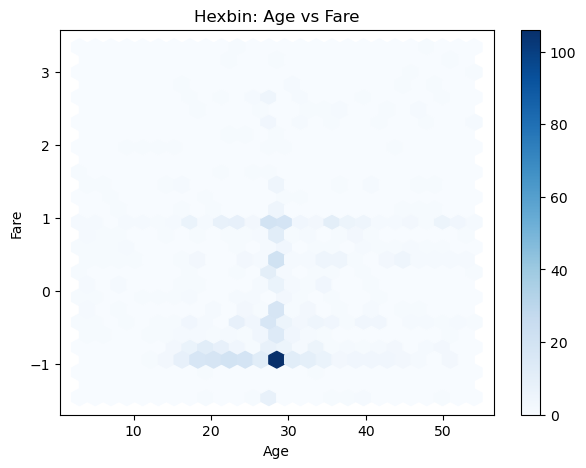

In [86]:
df_Titanic_Dataset.plot(kind='hexbin', x='Age', y='Fare', gridsize=25, cmap='Blues', figsize=(7,5))
plt.title("Hexbin: Age vs Fare")
plt.show()


✅ Regression Plot

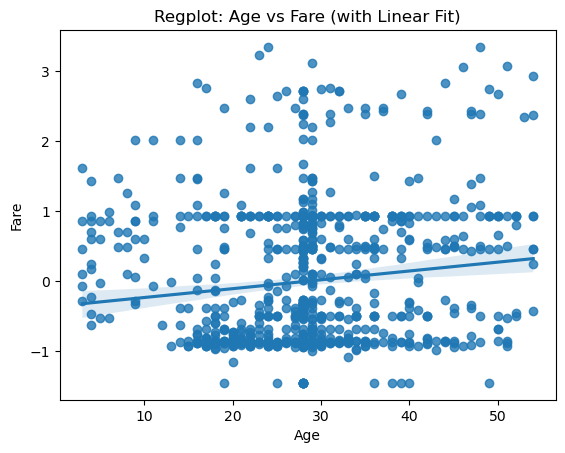

In [85]:
sns.regplot(data=df_Titanic_Dataset, x='Age', y='Fare')
plt.title("Regplot: Age vs Fare (with Linear Fit)")
plt.show()


✅ Jointplot (with regression)

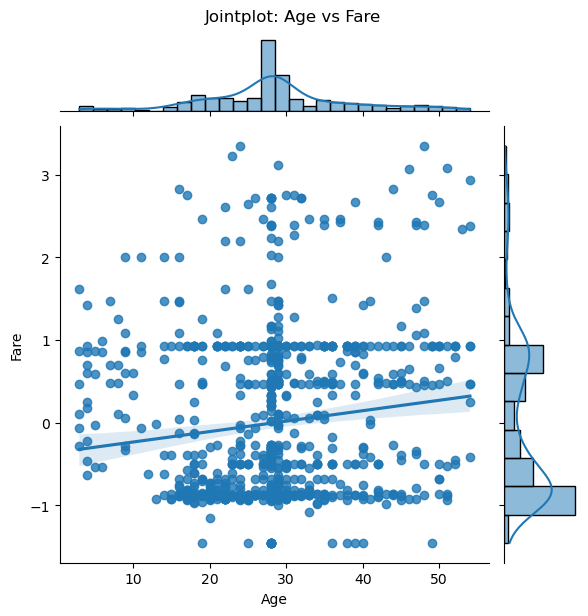

In [84]:
sns.jointplot(data=df_Titanic_Dataset, x='Age', y='Fare', kind='reg')
plt.suptitle("Jointplot: Age vs Fare", y=1.02)
plt.show()


### 4. 🧮 Correlation Matrix


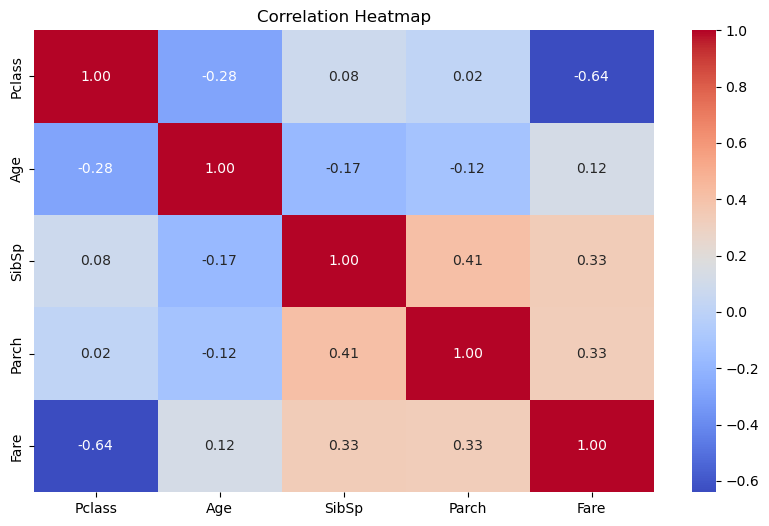

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Titanic_Dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### 🔹 (c) Multivariate Analysis
1. 📍 Numerical - Numerical - Categorical → Pairplot

🔹 1. Full Pairplot with Hue = Survived

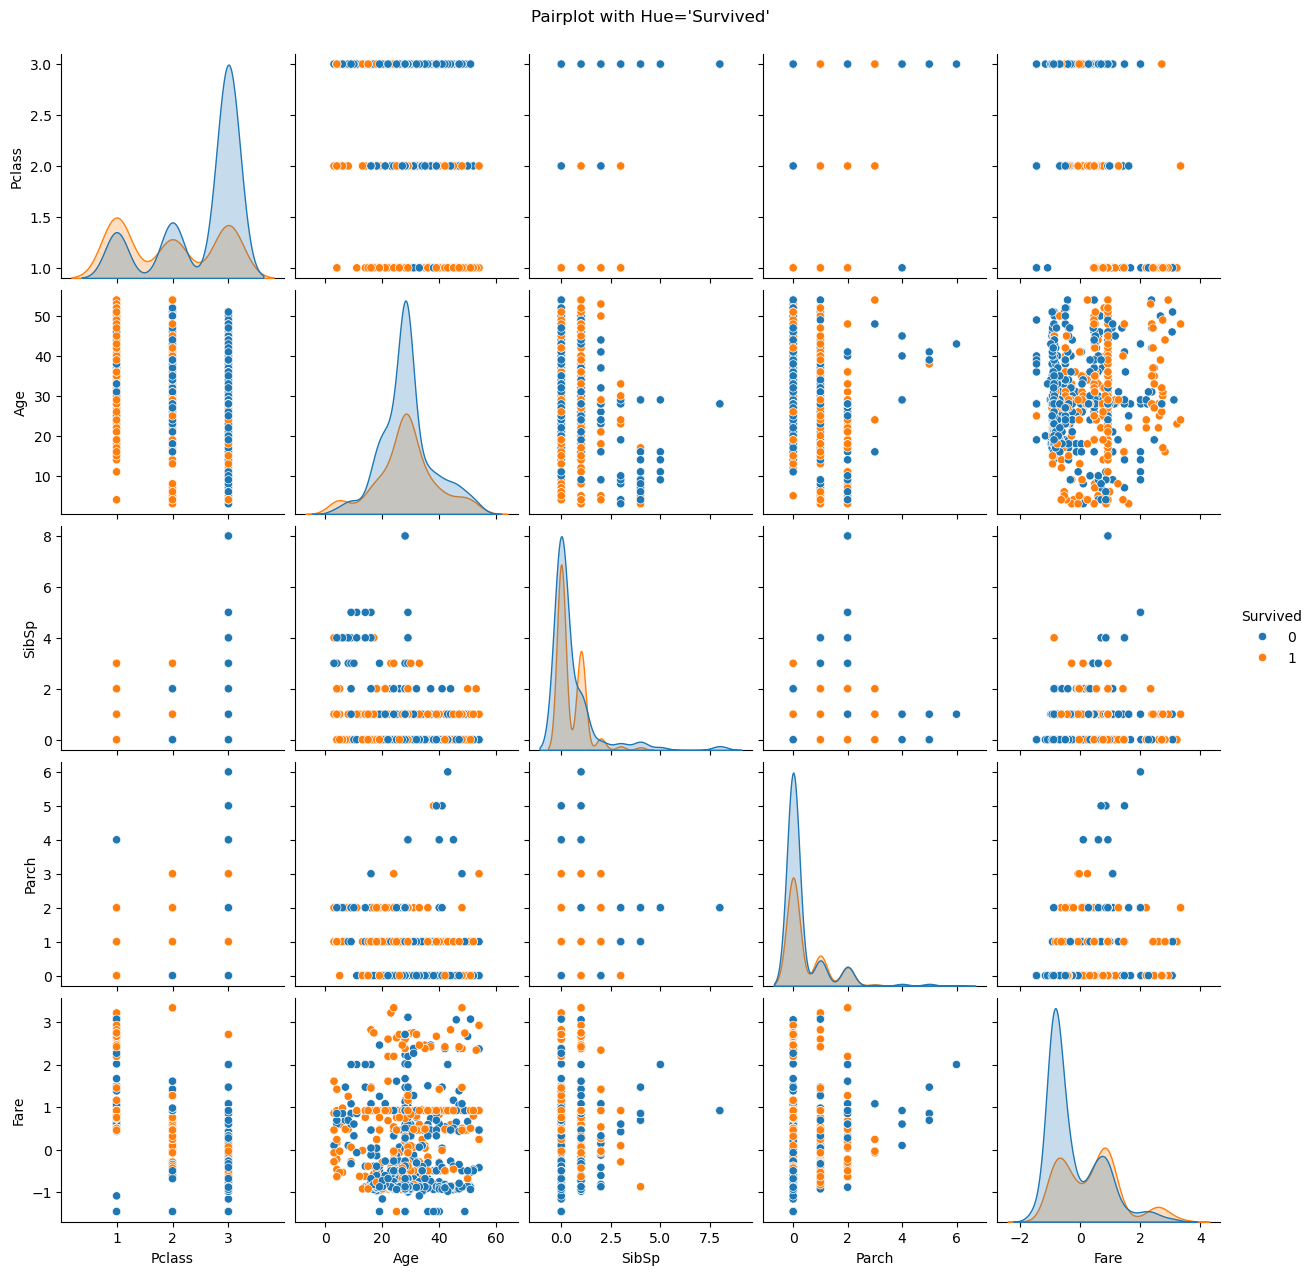

In [46]:
sns.pairplot(df_Titanic_Dataset, hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot with Hue='Survived'", y=1.02)
plt.show()


🔹 2. Pairplot with Hue = Sex_male

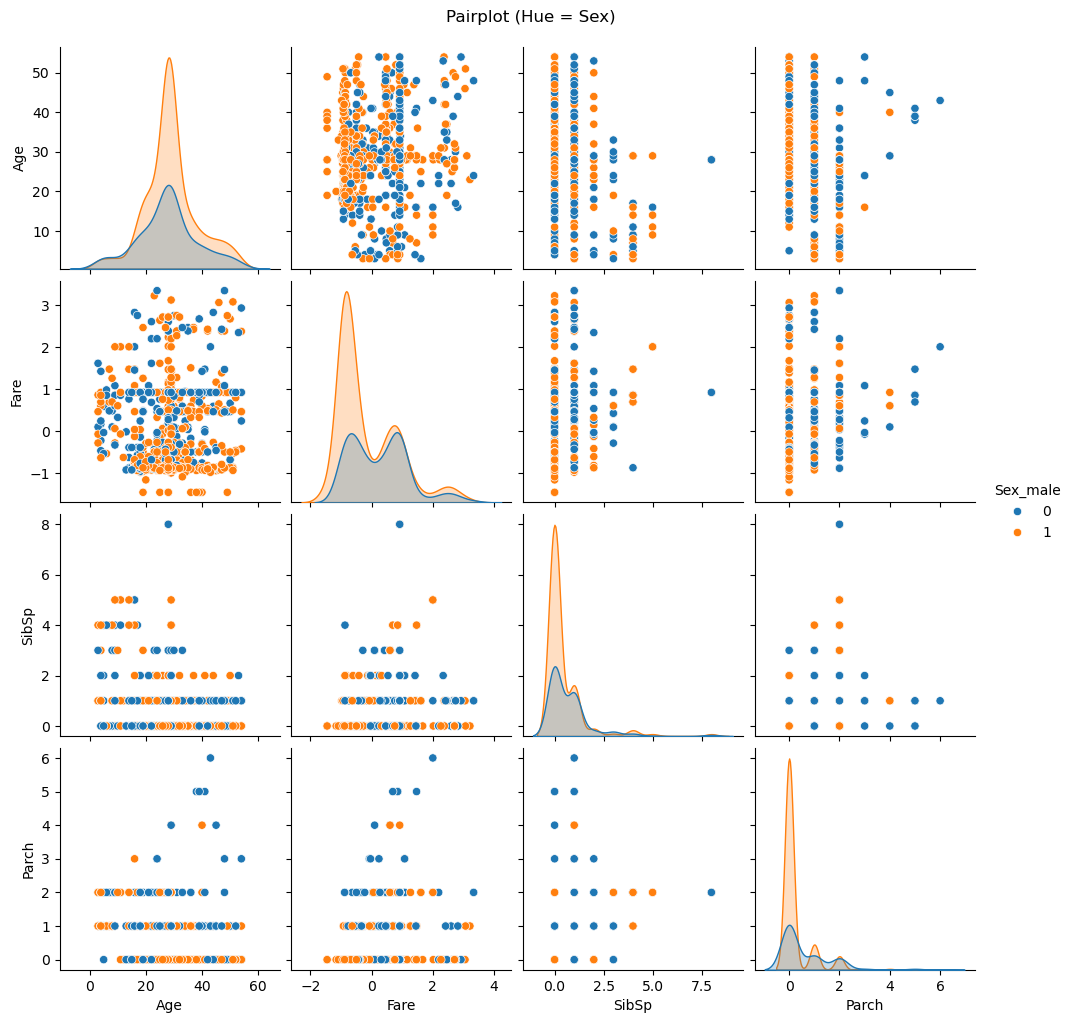

In [63]:
sns.pairplot(df_Titanic_Dataset[['Age', 'Fare', 'SibSp', 'Parch', 'Sex_male']], hue='Sex_male', diag_kind='kde')
plt.suptitle("Pairplot (Hue = Sex)", y=1.02)
plt.show()


🔹 3. Pairplot with Hue = Pclass

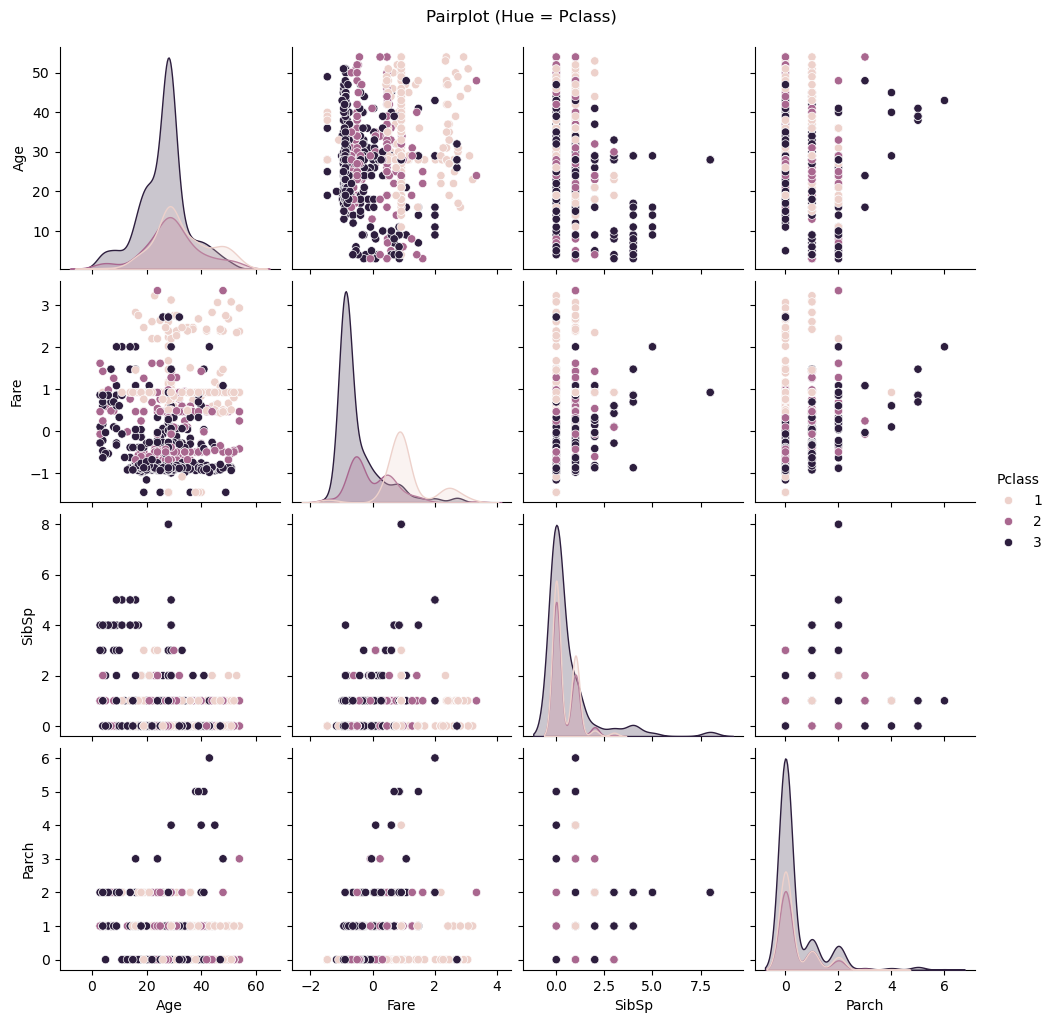

In [64]:
sns.pairplot(df_Titanic_Dataset[['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']], hue='Pclass', diag_kind='kde')
plt.suptitle("Pairplot (Hue = Pclass)", y=1.02)
plt.show()


🔸 Age vs Fare (Hue = Survived)

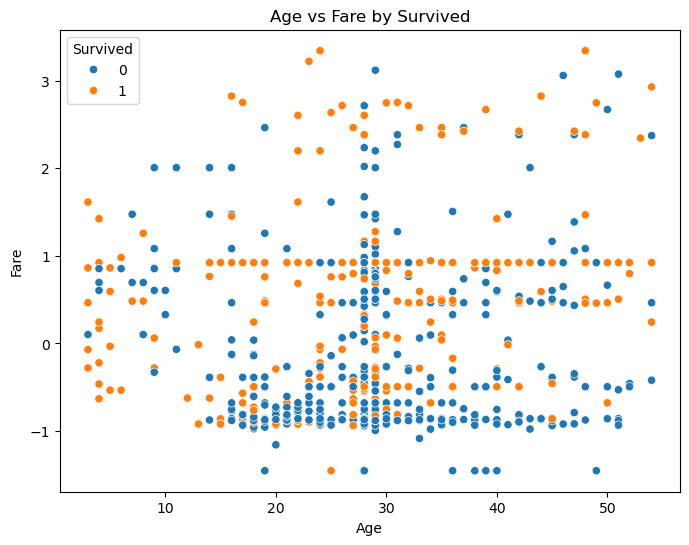

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_Titanic_Dataset, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare by Survived")
plt.show()


🔸 SibSp vs Parch (Hue = Survived)

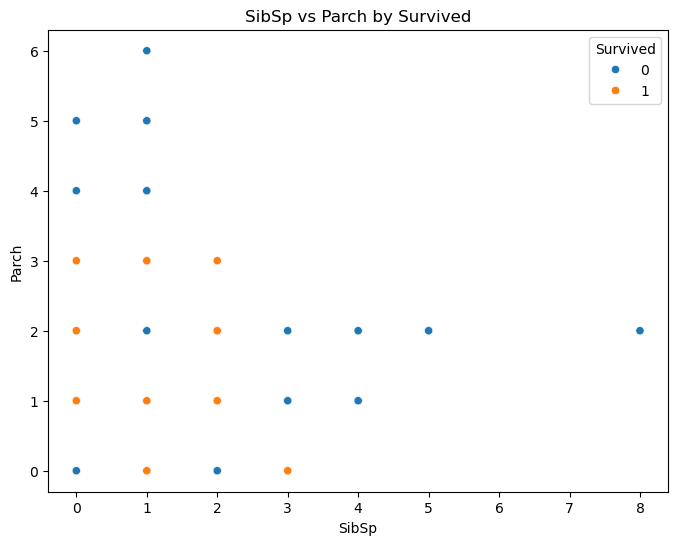

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_Titanic_Dataset, x='SibSp', y='Parch', hue='Survived')
plt.title("SibSp vs Parch by Survived")
plt.show()


### 2. 🧱 Categorical - Categorical - Numerical → Pivot Table + Plot

🔹 1. Average Fare by Pclass and Sex


C:\Users\satya\AppData\Local\Temp\ipykernel_3888\4262791060.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_Titanic_Dataset.pivot_table(index='Pclass', columns='Sex_male', values='Fare', aggfunc='mean')


Sex_male         0         1
Pclass                      
1         1.199585  1.038932
2         0.167953 -0.137616
3        -0.321330 -0.550839


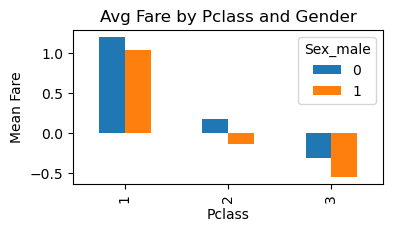

In [48]:
# Average Fare by Pclass and Sex
pivot = df_Titanic_Dataset.pivot_table(index='Pclass', columns='Sex_male', values='Fare', aggfunc='mean')
print(pivot)

# Barplot from pivot
pivot.plot(kind='bar', figsize=(4, 2))
plt.title("Avg Fare by Pclass and Gender")
plt.ylabel("Mean Fare")
plt.show()


🔹 2. Average Age by Survived and Pclass

C:\Users\satya\AppData\Local\Temp\ipykernel_3888\977134898.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Pclass            1          2          3
Survived                                 
0         33.825000  31.123711  26.959677
1         32.455882  27.551724  24.109244


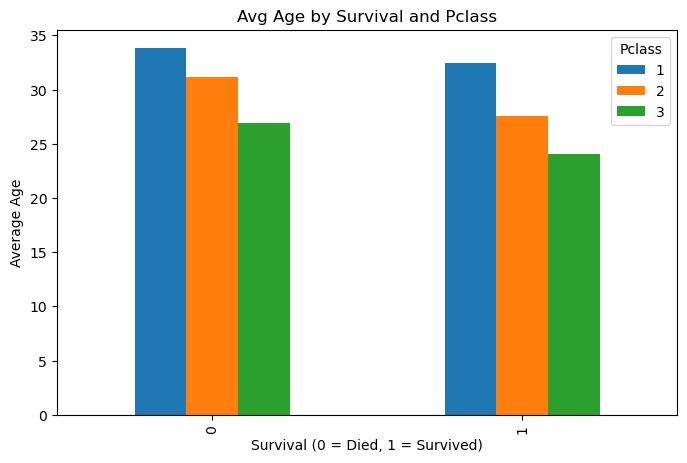

In [55]:
pivot2 = df_Titanic_Dataset.pivot_table(index='Survived', columns='Pclass', values='Age', aggfunc='mean')
print(pivot2)

pivot2.plot(kind='bar', figsize=(8, 5))
plt.title('Avg Age by Survival and Pclass')
plt.ylabel('Average Age')
plt.xlabel('Survival (0 = Died, 1 = Survived)')
plt.legend(title='Pclass')
plt.show()


🔹 3. Mean Siblings/Spouses (SibSp) by Gender and Survival

C:\Users\satya\AppData\Local\Temp\ipykernel_3888\3707667382.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Survived         0         1
Sex_male                    
0         1.209877  0.515021
1         0.440171  0.385321


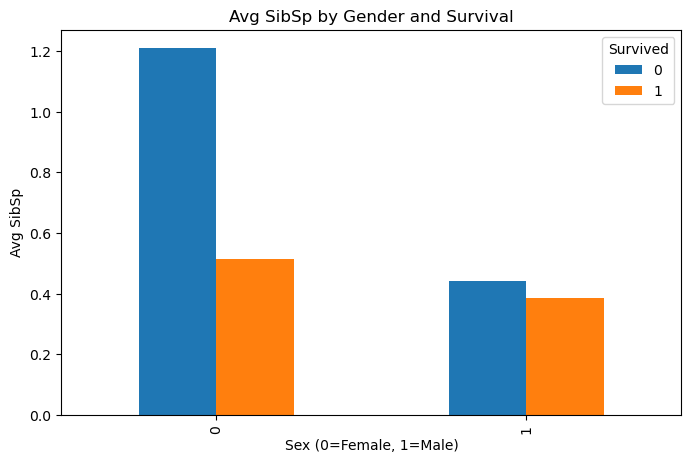

In [56]:
pivot3 = df_Titanic_Dataset.pivot_table(index='Sex_male', columns='Survived', values='SibSp', aggfunc='mean')
print(pivot3)

pivot3.plot(kind='bar', figsize=(8, 5))
plt.title('Avg SibSp by Gender and Survival')
plt.ylabel('Avg SibSp')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.legend(title='Survived')
plt.show()


🔹 4. Total Fare Paid by Embarkation Port and Survival

C:\Users\satya\AppData\Local\Temp\ipykernel_3888\2569684372.py:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Survived               0          1
Embarked_Port                      
C               2.448496  62.014228
Q             -26.322785 -18.684941
S             -98.870712  79.415714


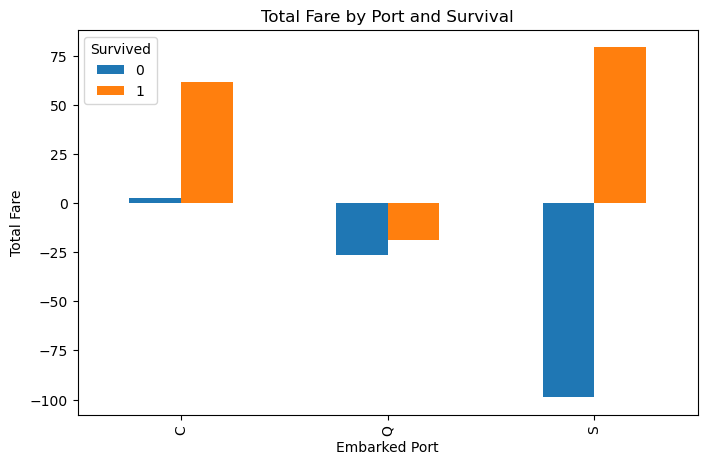

In [59]:
# Combine Embarked_Q and Embarked_S to make ports
df_Titanic_Dataset['Embarked_Port'] = df_Titanic_Dataset.apply(
    lambda row: 'Q' if row['Embarked_Q'] == 1 else ('S' if row['Embarked_S'] == 1 else 'C'), axis=1
)

pivot4 = df_Titanic_Dataset.pivot_table(index='Embarked_Port', columns='Survived', values='Fare', aggfunc='sum')
print(pivot4)

pivot4.plot(kind='bar', figsize=(8, 5))
plt.title('Total Fare by Port and Survival')
plt.ylabel('Total Fare')
plt.xlabel('Embarked Port')
plt.legend(title='Survived')
plt.show()


🔹 5. Average Parch by Gender and Pclass

C:\Users\satya\AppData\Local\Temp\ipykernel_3888\3420200092.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Pclass           1         2         3
Sex_male                              
0         0.457447  0.605263  0.798611
1         0.278689  0.222222  0.224784


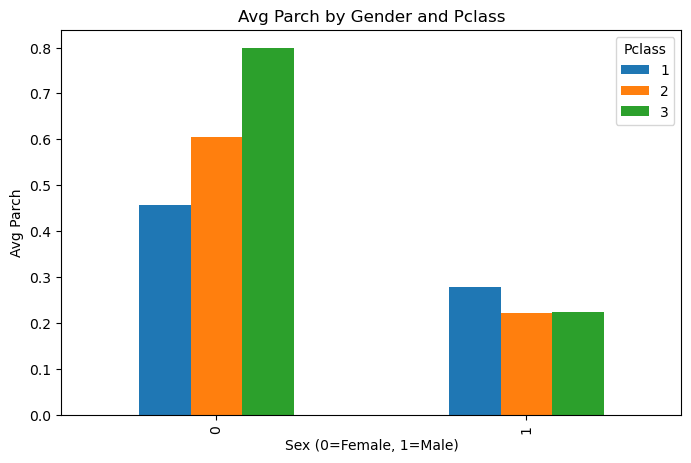

In [61]:
pivot5 = df_Titanic_Dataset.pivot_table(index='Sex_male', columns='Pclass', values='Parch', aggfunc='mean')
print(pivot5)

pivot5.plot(kind='bar', figsize=(8, 5))
plt.title('Avg Parch by Gender and Pclass')
plt.ylabel('Avg Parch')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.legend(title='Pclass')
plt.show()


### 3. 🔺 Numerical - Numerical - Numerical → 3D Scatter Plot (with Plotly)

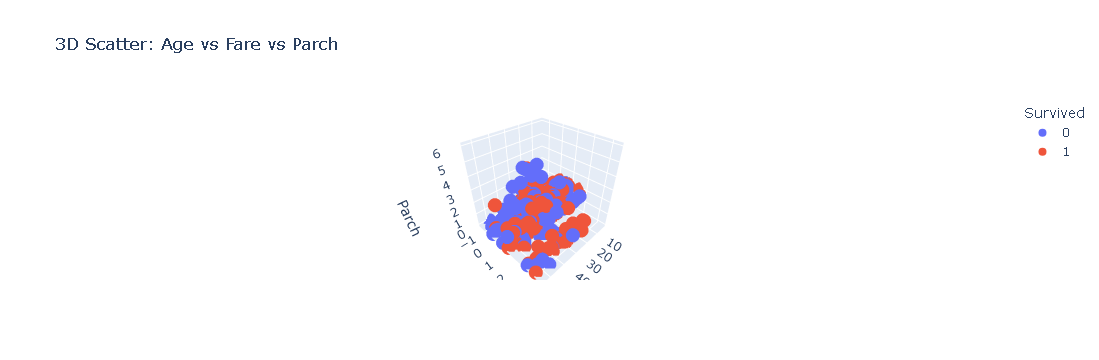

In [50]:
fig = px.scatter_3d(df_Titanic_Dataset, x='Age', y='Fare', z='Parch',
                    color='Survived',
                    title='3D Scatter: Age vs Fare vs Parch')
fig.show()


### 🔺 3D Scatter Plot 2: Age vs Fare vs SibSp

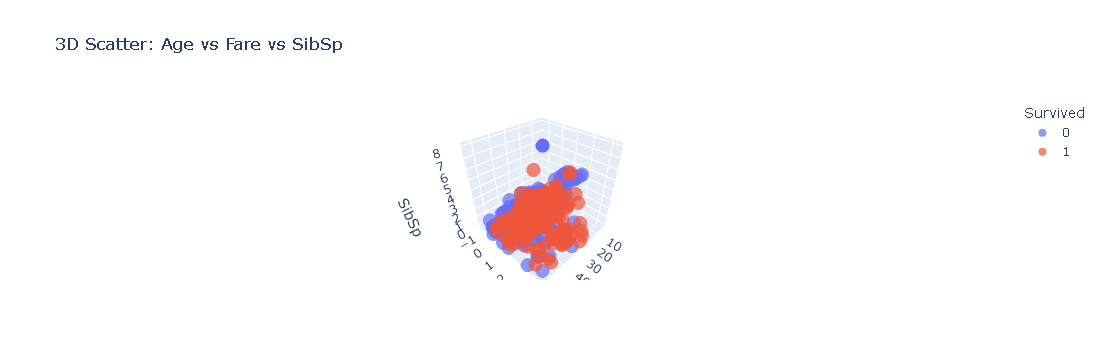

In [52]:
fig = px.scatter_3d(
    df_Titanic_Dataset, x='Age', y='Fare', z='SibSp',
    color='Survived',
    title='3D Scatter: Age vs Fare vs SibSp',
    opacity=0.7
)
fig.show()


### 🔺 3D Scatter Plot 3: Fare vs SibSp vs Parch

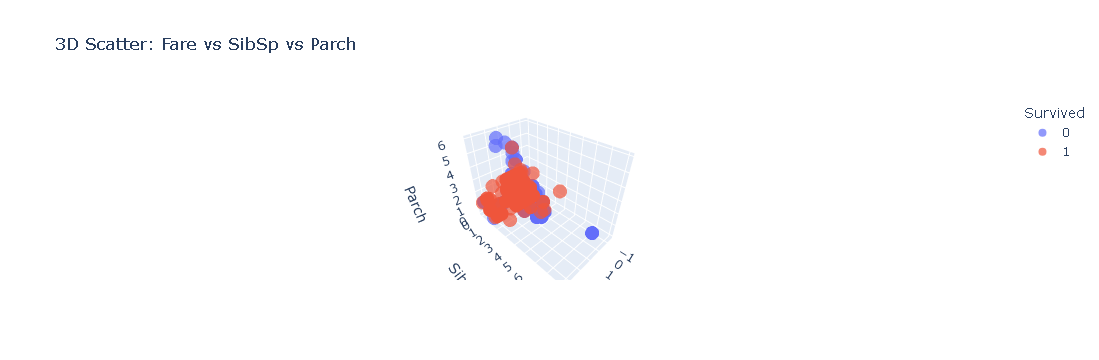

In [53]:
fig = px.scatter_3d(
    df_Titanic_Dataset, x='Fare', y='SibSp', z='Parch',
    color='Survived',
    title='3D Scatter: Fare vs SibSp vs Parch',
    opacity=0.7
)
fig.show()


### 🔺 3D Scatter Plot 4: Age vs SibSp vs Parch

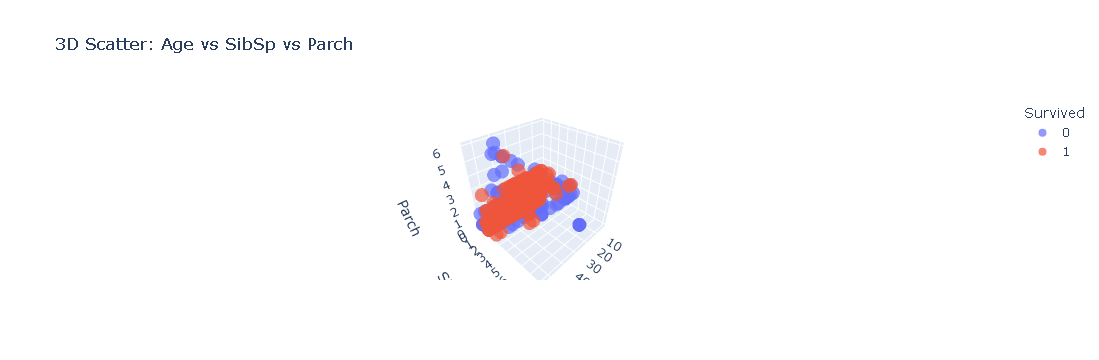

In [54]:
fig = px.scatter_3d(
    df_Titanic_Dataset, x='Age', y='SibSp', z='Parch',
    color='Survived',
    title='3D Scatter: Age vs SibSp vs Parch',
    opacity=0.7
)
fig.show()



# ✅ Conclusion – Data Understanding through EDA

---

## 🧠 Final Interpretation

We performed a detailed Exploratory Data Analysis (EDA) on the Titanic dataset with the objective of uncovering meaningful patterns, relationships, and anomalies in the data to better prepare it for machine learning.

---

### 🔬 Key Takeaways

- 🧹 **Data Preprocessing** ensured missing values were imputed, irrelevant columns removed, and outliers treated with robust statistical methods.
- 📊 **Univariate, Bivariate, and Multivariate Analysis** helped us uncover relationships between variables like `Pclass`, `Fare`, `Sex`, and `Survived`.
- 📈 **Visualization Techniques** like histograms, boxplots, scatter plots, and heatmaps revealed feature distributions, skewness, correlation, and trends.
- 🧠 **Correlation Matrix** helped us detect feature redundancies and guided potential feature selection for modeling.
- 🛑 **Multicollinearity**, **skewness**, and **outliers** were handled effectively, leading to a clean dataset suitable for ML modeling.

---

## 🎓 Learnings Recap

- ✅ Importance of EDA before modeling
- ✅ Different types of visualizations for numeric vs categorical data
- ✅ How missing values and outliers affect models
- ✅ The power of correlation and feature interaction analysis

---

## 📦 Next Step (Optional)

With this cleaned and explored dataset, the next logical steps are:
- Model development (e.g., Logistic Regression, Random Forest)
- Feature selection (using RFE or importance scores)
- Hyperparameter tuning and evaluation
- Deployment of a prediction system

---
